In [1]:
import numpy as np
import syndat
import pandas as pd
import os
from matplotlib.pyplot import *
# import ATARI
from ATARI import PiTFAll as pf
import h5py
h5py.enable_ipython_completer()


In [2]:
%matplotlib widget

In [3]:
# Peformance Test for Fitting ALgorithm (PiTFALl)

In [4]:
# Initialize particle pair and quantup spin groups of interest

ac = 0.81271    # scattering radius in 1e-12 cm 
M = 180.948030  # amu of target nucleus
m = 1           # amu of incident neutron
I = 3.5         # intrinsic spin, positive parity
i = 0.5         # intrinsic spin, positive parity [sic: perhaps, angular momentum?]
l_max = 1       # highest order l-wave to consider

spin_groups = [ (3.0,1,0) ] # (4.0,1,0) 
average_parameters = pd.DataFrame({ 'dE'    :   {'3.0':8.79, '4.0':4.99},
                                    'Gg'    :   {'3.0':46.4, '4.0':35.5},
                                    'gn2'    :   {'3.0':64.0, '4.0':64.0}  })

Ta_pair = syndat.particle_pair( ac, M, m, I, i, l_max,
                                spin_groups=spin_groups, average_parameters=average_parameters,
                                input_options={})


In [5]:

# initialize experimental setup
E_min_max = [100, 120]
input_options = { 'Add Noise': True,
            'Sample TURP':True,
            'Sample TOCS':True, 
            'Calculate Covariance': False,
            'Compression Points':[],
            'Grouping Factors':None}

experiment_parameters = {'bw': {'val':0.3,    'unc'   :   0}}

exp = syndat.experiment(E_min_max, 
                        input_options=input_options, 
                        experiment_parameters=experiment_parameters)
len(exp.energy_domain)

74

In [6]:
# run a performance test with the PiTFAll module

# case_file = './perf_test_baron'
case_file = './perf_test_baron.hdf5'
number_of_datasets = 100

# case_file = './perf_test_baron_rev2.hdf5'
# number_of_datasets = 27

path_to_application_exe = '/Applications/MATLAB_R2021b.app/bin/matlab'
path_to_fitting_script = "/Users/noahwalton/Documents/GitHub/ATARI/baron_fit_rev1.m"

input_options = {   'Overwrite Syndats'    :   False, 
                    'Overwrite Fits'       :   False,
                    'Use HDF5'             :   True    } 

perf_test = pf.performance_test(number_of_datasets,
                                case_file,
                                input_options=input_options)

sample_data_df = perf_test.generate_syndats(Ta_pair, exp, 
                                                solver='syndat_SLBW')

In [7]:
# test accessing generated data
# sample_0 = pd.read_hdf(case_file, 'sample_0/syndat_par')
# sample_data_df = pd.read_hdf(case_file, 'test_stats/sample_data')

print(f"Average # Resonances: {np.mean(sample_data_df.NumRes)}")
print(f"Min/Max # Resonances: {np.min(sample_data_df.NumRes)}/{np.max(sample_data_df.NumRes)}")
print(f"Energy Points (constant): {np.mean(sample_data_df.NumEpts)}")
print(f"Min theoretical SE: {np.min(sample_data_df.theo_exp_SE)}")
# sample_0

Average # Resonances: 2.33
Min/Max # Resonances: 1/5
Energy Points (constant): 74.0
Min theoretical SE: 0.02209855810184489


In [8]:
out = perf_test.generate_fits(False)
print(out)

User chose to NOT run the fitting algorithm locally. The data file ./perf_test_baron.hdf5 has been prepared based on the selected overwrite options. Please run samples 100-100


In [9]:
# f = h5py.File(case_file, 'r+')
# # del f['sample_0']['fit_par']
# # del f['sample_0']['fit_pw']
# print(f['sample_9'].keys())
# # type(f['sample_9'])
# # print(f['test_stats/sample_data'].keys())
# f.close()


In [10]:
integral_FoMs, sample_data = perf_test.analyze()
# pd.read_hdf(case_file, 'integral_FoMs')
integral_FoMs

,fit_theo_SE,fit_exp_SE,fit_exp_chi2,fit_exp_chi2dof,theo_exp_SE,theo_exp_chi2,theo_exp_chi2dof
0,0.000088,0.076314,1259.601343,17.021640,0.052749,69.637873,0.941052
1,0.000057,0.083576,118.030696,1.595009,0.065242,81.833544,1.105859
2,0.000985,0.493006,9064.338758,122.491064,0.051709,69.442108,0.938407
3,0.000421,0.199803,458.066686,6.190090,0.092407,125.467156,1.695502
4,0.000049,0.056138,133.817194,1.808340,0.039298,61.106791,0.825767
...,...,...,...,...,...,...,...
95,0.000071,0.052568,96.480125,1.303785,0.084159,131.519133,1.777286
96,0.000955,0.620060,13476.525749,182.115213,0.173017,214.228799,2.894984
97,0.000014,0.062914,119.839441,1.619452,0.069142,108.069628,1.460400
98,0.000178,0.109106,303.057790,4.095376,0.026557,37.254114,0.503434


(-0.1, 6.0)

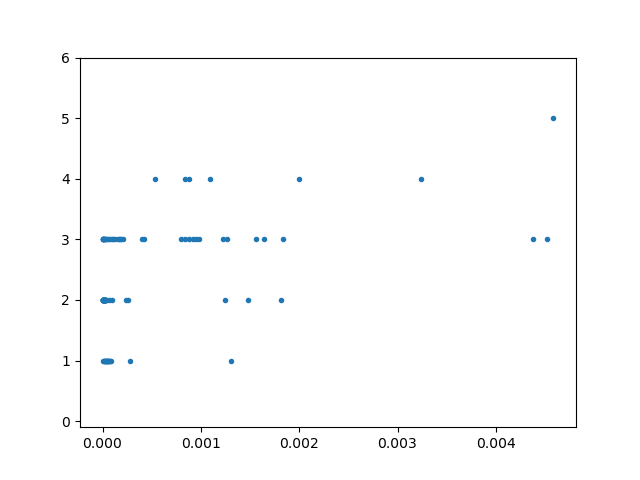

In [11]:
figure()
scatter(integral_FoMs.fit_theo_SE, sample_data.NumRes, marker='.', s=35)
ylim([-0.1,np.max(sample_data_df.NumRes)+1])
# xlim([0-np.max(integral_FoMs.fit_theo_SE)/3,np.max(integral_FoMs.fit_theo_SE)*1.1])

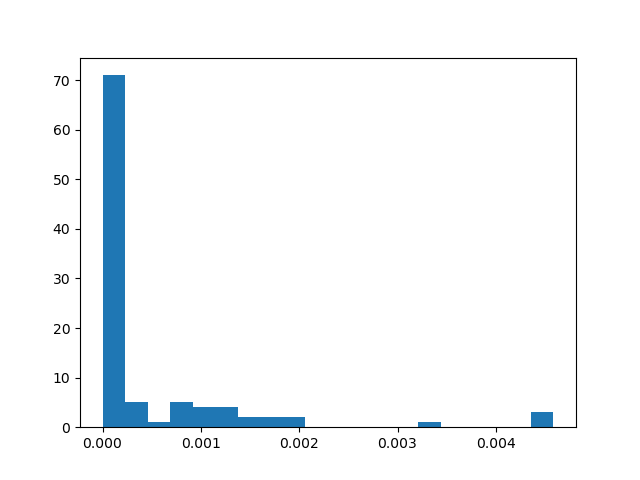

In [12]:
figure()
bins = hist(integral_FoMs.fit_theo_SE, bins=20)



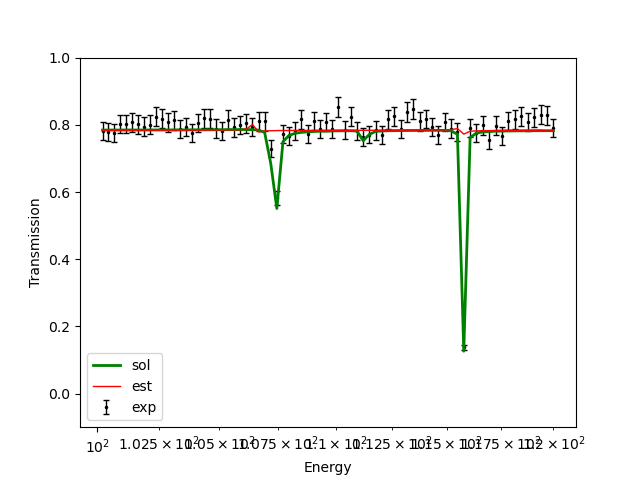

In [13]:
pf.sample_case.plot_trans(case_file, 2, True)


In [14]:
pw_data, syndat_par_df, fit_par_df = pf.sample_case.read_sample_case_data(case_file,2)
# figure()
# plot(pw_data.E, pw_data.theo_trans)
# plot(pw_data.E, pw_data.est_trans)
# plot(pw_data.E, pw_data.exp_trans, '.', color='k')
print(np.sum((pw_data.theo_trans-pw_data.est_trans)**2))

from scipy import interpolate
def interp(x,y):
    f_interp = interpolate.interp1d(x, y)
    minx = min(x); maxx = max(x)
    n = int((maxx - minx)*1e2)
    new_x = np.linspace(minx, maxx, n)
    new_y = f_interp(new_x)
    return new_x, new_y

def fine_egrid(energy):
    minE = min(energy); maxE = max(energy)
    n = int((maxE - minE)*1)
    new_egrid = np.linspace(minE, maxE, n)
    return new_egrid

new_egrid = fine_egrid(pw_data.E)
xs_tot_syndat, xs_scat_syndat, xs_cap_syndat = syndat.scattering_theory.SLBW(new_egrid, Ta_pair, syndat_par_df)

if all(item in fit_par_df.columns for item in ['J', 'chs', 'lwave', 'J_ID']):
    print('yes')
else:
    fit_par_df[['J', 'chs', 'lwave', 'J_ID']] = syndat_par_df[['J', 'chs', 'lwave', 'J_ID']]

print(fit_par_df)
print(syndat_par_df)

xs_tot_fit, xs_scat_fit, xs_cap_fit = syndat.scattering_theory.SLBW(new_egrid, Ta_pair, fit_par_df)

0.48420091894836753
            E        Gg      gnx2    J  chs  lwave  J_ID
0  106.452440  0.000000  2.608033  3.0  1.0    0.0   1.0
1  115.680050  0.000000  2.744952  3.0  1.0    0.0   1.0
2  119.549004  3.819152  0.483797  3.0  1.0    0.0   1.0
            E         Gg       gnx2    J  chs  lwave  J_ID
0  107.325288  45.729323  13.039971  3.0  1.0    0.0   1.0
1  111.301920  45.463319   1.314435  3.0  1.0    0.0   1.0
2  115.754034  50.009353   5.738813  3.0  1.0    0.0   1.0


NameError: name 'theo_int' is not defined

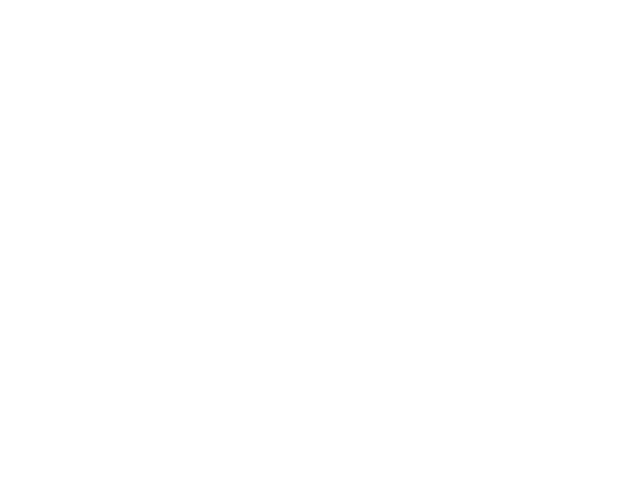

In [15]:
figure()
# plot(new_egrid, xs_tot_fit)
# plot(new_egrid, xs_tot_syndat, color='g')
# plot(new_egrid[0:-1], est_int)
# plot(new_egrid[0:-1], theo_int, color='g')
# plot(new_egrid,(xs_tot_syndat-xs_tot_fit)**2)
# plot((theo_int-est_int)**2)

In [ ]:

###
# def integral_SE(energy, theo, est):

# numerically integrate over fine grid as (x2-x1)*(y(x1.5)) where x1.5 is the midpoint between x1 and x2
theo_int = np.diff(new_egrid)*(xs_tot_syndat[0:-1]+(np.diff(xs_tot_syndat)/2))
est_int = np.diff(new_egrid)*(xs_tot_fit[0:-1]+(np.diff(xs_tot_fit)/2))

from scipy import integrate
# calculate SE of integral values
# est_sol_SE = integrate.trapezoid((xs_tot_syndat-xs_tot_fit)**2, new_egrid)
est_sol_SE = np.sum((theo_int-est_int)**2)
print(est_sol_SE)
SE = (xs_tot_syndat-xs_tot_fit)**2
sum_SE = np.sum(SE)
print(sum_SE)
print(np.sum(np.diff(new_egrid)*(SE[0:-1]+(np.diff(SE)/2))))
    # return est_sol_SE

1.1061118141934143
1.6818529438372516
1.84921686572212
